<center>Myranda Swartzwelter<br>
    DSC-550 T301 Data Mining<br>
    Week 4 Assignment: Regression Analysis<br>
4/5/2022
   

In [71]:
#import necessary packages
import pandas as pd
import numpy as np

Load the data as a Pandas data frame and ensure that it imported correctly.


In [72]:
#import file 
autos = pd.read_csv('auto-mpg.csv')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [73]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Begin by prepping the data for modeling:
<br>Remove the car name column.
<br>The horsepower column values likely imported as a string data type. Figure out why and replace any strings with <br>the column mean.
<br>Create dummy variables for the origin column.

In [74]:
#remove car name column
autos = autos.drop(columns=['car name'])
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [75]:
#The horsepower column values likely imported as a string data type. Figure out why and replace any strings with
#the column mean.
#autos['horsepower'].median()
autos['horsepower'].replace('?', np.nan, inplace=True)
autos = autos.astype({'horsepower':'float'})
#autos['horsepower'].mean()
autos['horsepower'].replace(np.nan,autos['horsepower'].median(), inplace=True )
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [76]:
#Create dummy variables for the origin column.
autos.origin.unique()
autos['origin'].replace(1, 'America', inplace=True)
autos['origin'].replace(2, 'Europe', inplace=True)
autos['origin'].replace(3, 'Asia', inplace=True)
autos = autos.astype({'origin':'str'})
autos.origin.unique()

array(['America', 'Asia', 'Europe'], dtype=object)

Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?


In [77]:
#correlation matrix

In [78]:
#create a correlation matrix
autos.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


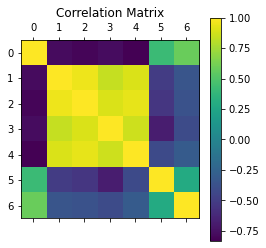

In [79]:
#visualize the correlation matrix
import matplotlib.pyplot as plt

plt.matshow(autos.corr())
cb = plt.colorbar()
plt.title('Correlation Matrix')
plt.show()


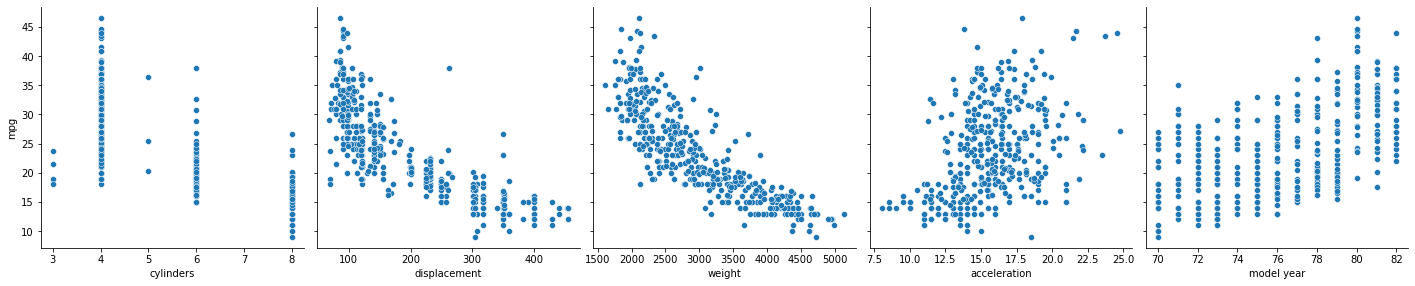

In [80]:
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(autos, x_vars=['cylinders', 'displacement','weight','acceleration', 'model year'], 
             y_vars='mpg', height=4, aspect=1, kind='scatter')
plt.show()

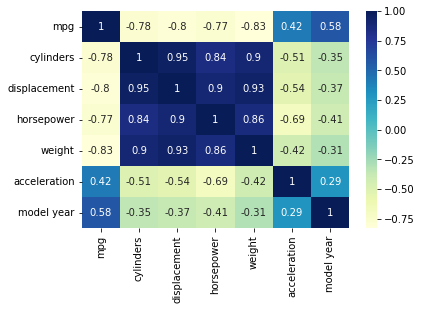

In [81]:
sns.heatmap(autos.corr(), cmap="YlGnBu", annot = True)
plt.show()

<AxesSubplot:xlabel='origin', ylabel='mpg'>

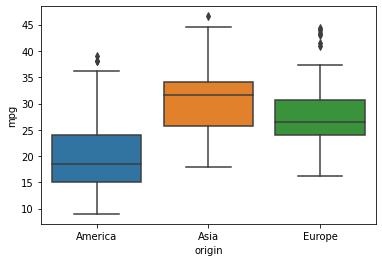

In [87]:
sns.boxplot(y='mpg',x='origin',data=autos)

Which features are highly correlated with mpg?
<br> cylinders, displacement, horsepower and weight all seem to be highly negatively correlated with mpg


Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

<AxesSubplot:xlabel='mpg'>

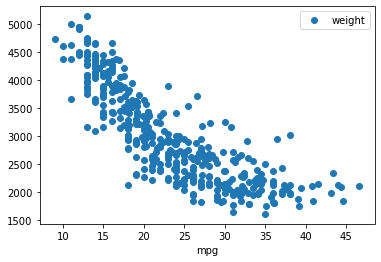

In [82]:
autos.plot(x='mpg', y='weight', style='o')

It appears that in general, as weight decreases, mpg increases. This is consistent with mpg being negatively correlated to weight.

Randomly split the data into 80% training data and 20% test data, where your target is mpg.


In [83]:
#use sklearn to split data
from sklearn import model_selection


#autos = autos.drop(columns=['origin'])


#create input (x) and output (y)
y= autos.mpg
x=autos.drop('mpg',axis=1)

#split data
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)


Train an ordinary linear regression on the training data.


In [84]:
# Shape of the train set without adding column
x_train.shape
y_train.shape
# Adding additional column to the train and test data
#x_train = x_train.values.reshape(-1,1)
#X_test_lm = X_test_lm.values.reshape(-1,1)

#print(X_train_lm.shape)
#print(X_test_lm.shape)

(318,)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(x_train, y_train)

ValueError: could not convert string to float: 'America'

In [60]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : -18.292685184524593
Slope : [-0.21510436  0.00404823  0.00169214 -0.00668483  0.07266463  0.79835449]


In [61]:

# Making Predictions of y_value
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8155540922952681
0.7772441274704862


In [62]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

11.322735192028714
13.171409951353008


In [63]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train,y_train_pred))
print(mean_absolute_error(y_test,y_test_pred))

2.618713813552716
2.7365391242567325
